# **Steps to Implement and Compare SIFT, SURF, and ORB**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if you have the contrib modules with SIFT and SURF support
print("OpenCV version:", cv2.__version__)


OpenCV version: 4.10.0


# **2. Load Images**

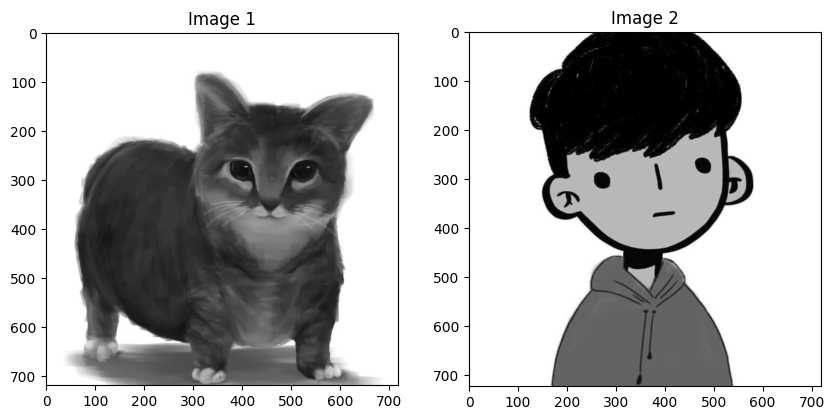

In [2]:
# Load images
image1 = cv2.imread('sample1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('sample2.jpg', cv2.IMREAD_GRAYSCALE)

# Display images to verify load
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.show()


# **3. Extract Keypoints and Descriptors Using SIFT, SURF, and ORB**

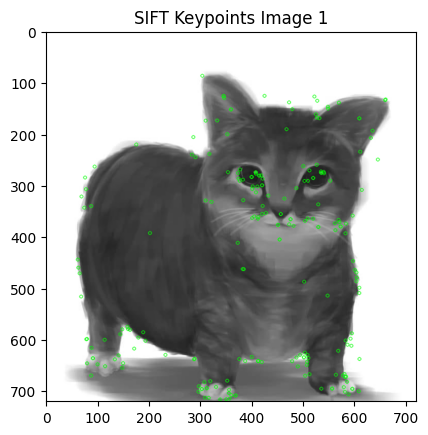

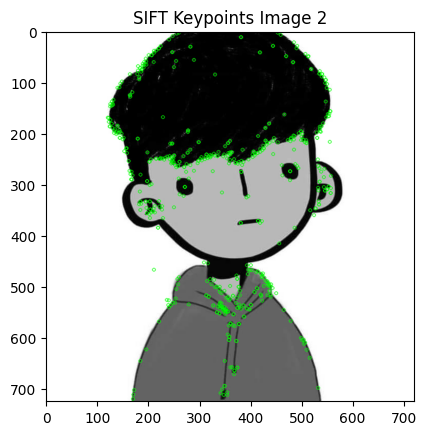

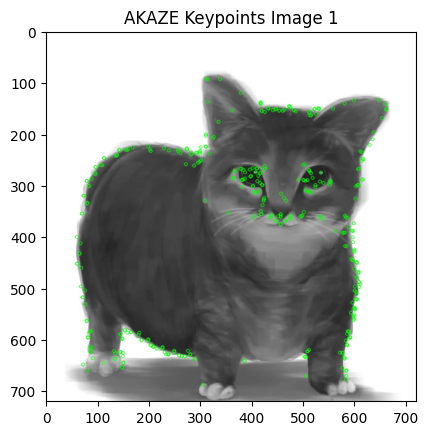

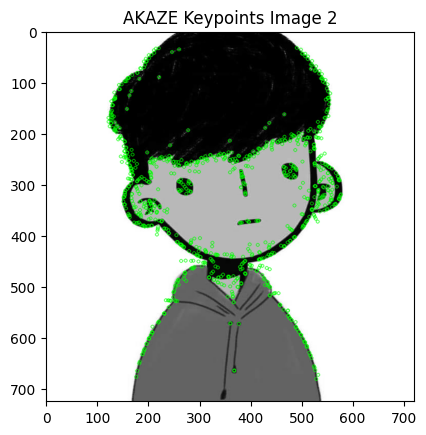

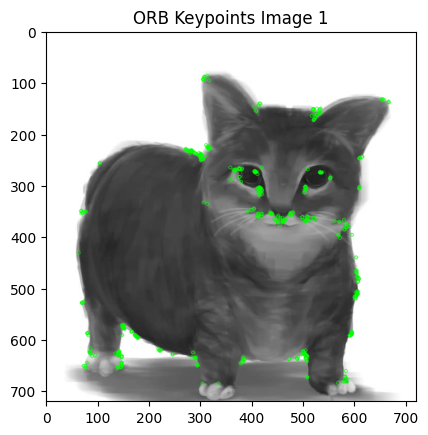

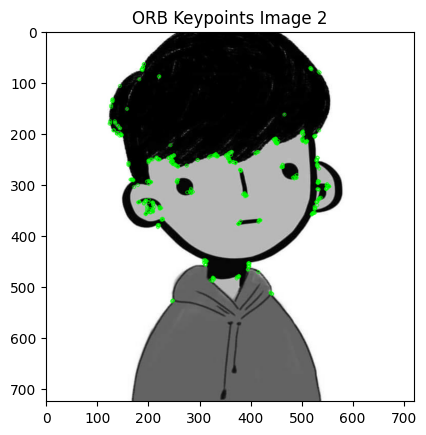

In [7]:
def extract_features(detector, img):
    keypoints, descriptors = detector.detectAndCompute(img, None)
    return keypoints, descriptors

# Initialize feature detectors
sift = cv2.SIFT_create()
akaze = cv2.AKAZE_create()  # Use AKAZE instead of SURF
orb = cv2.ORB_create(nfeatures=500)

# Extract features
sift_keypoints1, sift_descriptors1 = extract_features(sift, image1)
sift_keypoints2, sift_descriptors2 = extract_features(sift, image2)

akaze_keypoints1, akaze_descriptors1 = extract_features(akaze, image1)
akaze_keypoints2, akaze_descriptors2 = extract_features(akaze, image2)

orb_keypoints1, orb_descriptors1 = extract_features(orb, image1)
orb_keypoints2, orb_descriptors2 = extract_features(orb, image2)

# Visualization function remains the same
def draw_keypoints(img, keypoints, title):
    img_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0))
    plt.imshow(img_keypoints)
    plt.title(title)
    plt.show()

# Draw keypoints for SIFT, AKAZE, and ORB
draw_keypoints(image1, sift_keypoints1, "SIFT Keypoints Image 1")
draw_keypoints(image2, sift_keypoints2, "SIFT Keypoints Image 2")
draw_keypoints(image1, akaze_keypoints1, "AKAZE Keypoints Image 1")
draw_keypoints(image2, akaze_keypoints2, "AKAZE Keypoints Image 2")
draw_keypoints(image1, orb_keypoints1, "ORB Keypoints Image 1")
draw_keypoints(image2, orb_keypoints2, "ORB Keypoints Image 2")


# **4. Feature Matching with Brute-Force and FLANN**

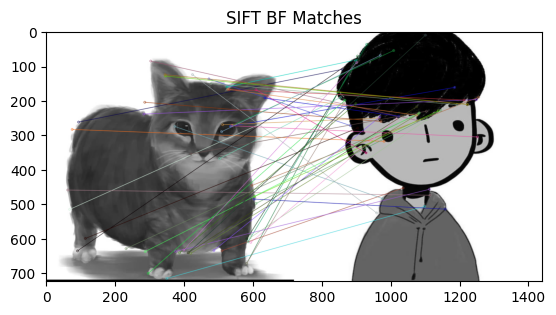

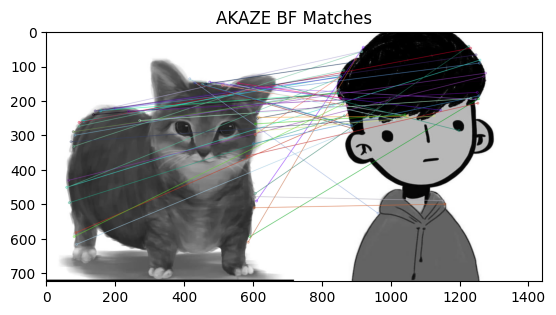

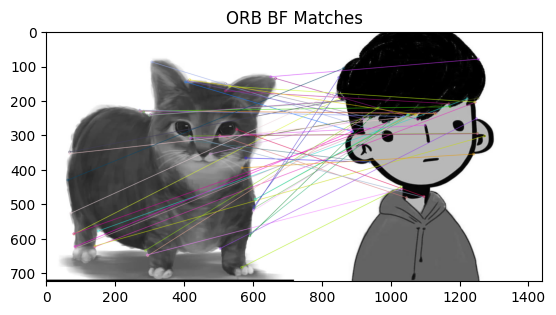

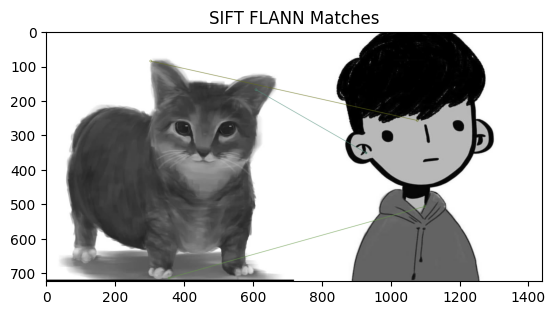

In [9]:
# Match with BF and FLANN for SIFT only; BF for AKAZE and ORB
norm_types = {
    "SIFT": cv2.NORM_L2,
    "AKAZE": cv2.NORM_HAMMING,  # Using Hamming norm for binary descriptors
    "ORB": cv2.NORM_HAMMING
}

# Update feature matching for SIFT, AKAZE, and ORB
sift_bf_matches = match_features_bf(sift_descriptors1, sift_descriptors2, norm_types["SIFT"])
akaze_bf_matches = match_features_bf(akaze_descriptors1, akaze_descriptors2, norm_types["AKAZE"])
orb_bf_matches = match_features_bf(orb_descriptors1, orb_descriptors2, norm_types["ORB"])

# FLANN index and search params (use only for SIFT)
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)

# FLANN matching for SIFT only
sift_flann_matches = match_features_flann(sift_descriptors1, sift_descriptors2, index_params, search_params)

# Define the draw_matches function to visualize the matches
def draw_matches(img1, kp1, img2, kp2, matches, title):
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img_matches)
    plt.title(title)
    plt.show()

# Draw matches for each feature detector and matching method
draw_matches(image1, sift_keypoints1, image2, sift_keypoints2, sift_bf_matches, "SIFT BF Matches")
draw_matches(image1, akaze_keypoints1, image2, akaze_keypoints2, akaze_bf_matches, "AKAZE BF Matches")
draw_matches(image1, orb_keypoints1, image2, orb_keypoints2, orb_bf_matches, "ORB BF Matches")

# Draw FLANN matches for SIFT only
draw_matches(image1, sift_keypoints1, image2, sift_keypoints2, sift_flann_matches, "SIFT FLANN Matches")


# **4. Image Alignment Using Homography**

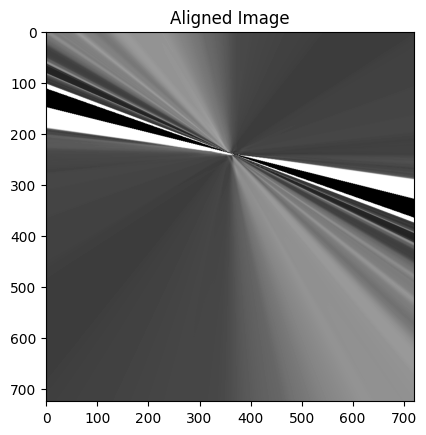

In [10]:
# Calculate homography using SIFT matches (or any other method of choice)
def align_images(img1, img2, kp1, kp2, matches):
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    aligned_img = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
    return aligned_img

# Align and display the images
aligned_image = align_images(image1, image2, sift_keypoints1, sift_keypoints2, sift_bf_matches)
plt.imshow(aligned_image, cmap='gray')
plt.title("Aligned Image")
plt.show()
